In [1]:
# KNN Classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import normalize, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix



from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix

In [2]:
Glass=pd.read_csv("glass.csv")
Glass.head(30)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [3]:
Glass.shape

(214, 10)

In [4]:
array = Glass.values
X = array[:, 0:10]
Y = array[:, 9]

In [5]:
X

array([[ 1.52101, 13.64   ,  4.49   , ...,  0.     ,  0.     ,  1.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  0.     ,  0.     ,  1.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  0.     ,  0.     ,  1.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  1.64   ,  0.     ,  7.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  1.57   ,  0.     ,  7.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  1.67   ,  0.     ,  7.     ]])

In [6]:
Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 6., 6., 6., 6., 6., 6., 6., 6., 6., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7.])

In [7]:
model = KNeighborsClassifier(n_neighbors=1)
results = cross_val_score(model, X, Y)

In [8]:
print(results.mean())

0.9627906976744185


# Grid Search for Algorithm Tuning to find best n_neighbours


In [9]:
import numpy
from sklearn.model_selection import GridSearchCV

In [10]:
array = Glass.values
X = array[:, 0:9]
Y = array[:, 9]

In [11]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [12]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [13]:
print(grid.best_score_)
print(grid.best_params_)

0.640531561461794
{'n_neighbors': 1}


Text(0, 0.5, 'Count')

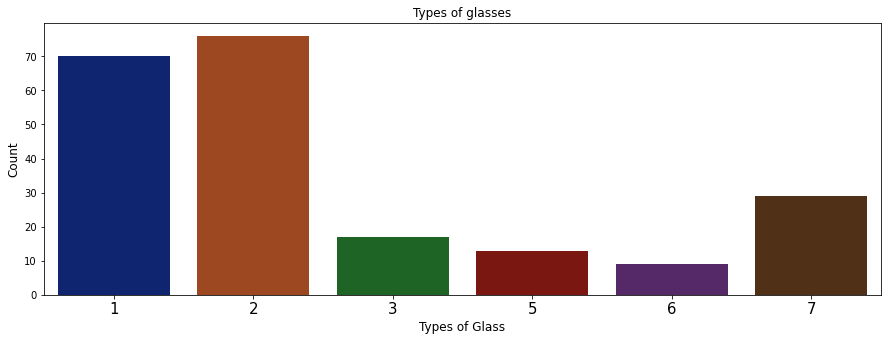

In [14]:
plt.figure(figsize=(15, 5))
    
plt.title("Types of glasses")
sns.countplot(data=Glass, x="Type",palette = "dark")
plt.xticks(rotation = 0, size = 15)
plt.xlabel("Types of Glass", fontsize=12)
plt.ylabel("Count", fontsize=12)

<AxesSubplot:>

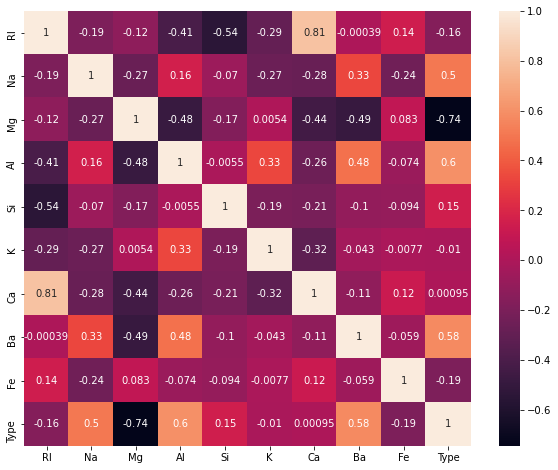

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(Glass.corr(),annot=True)

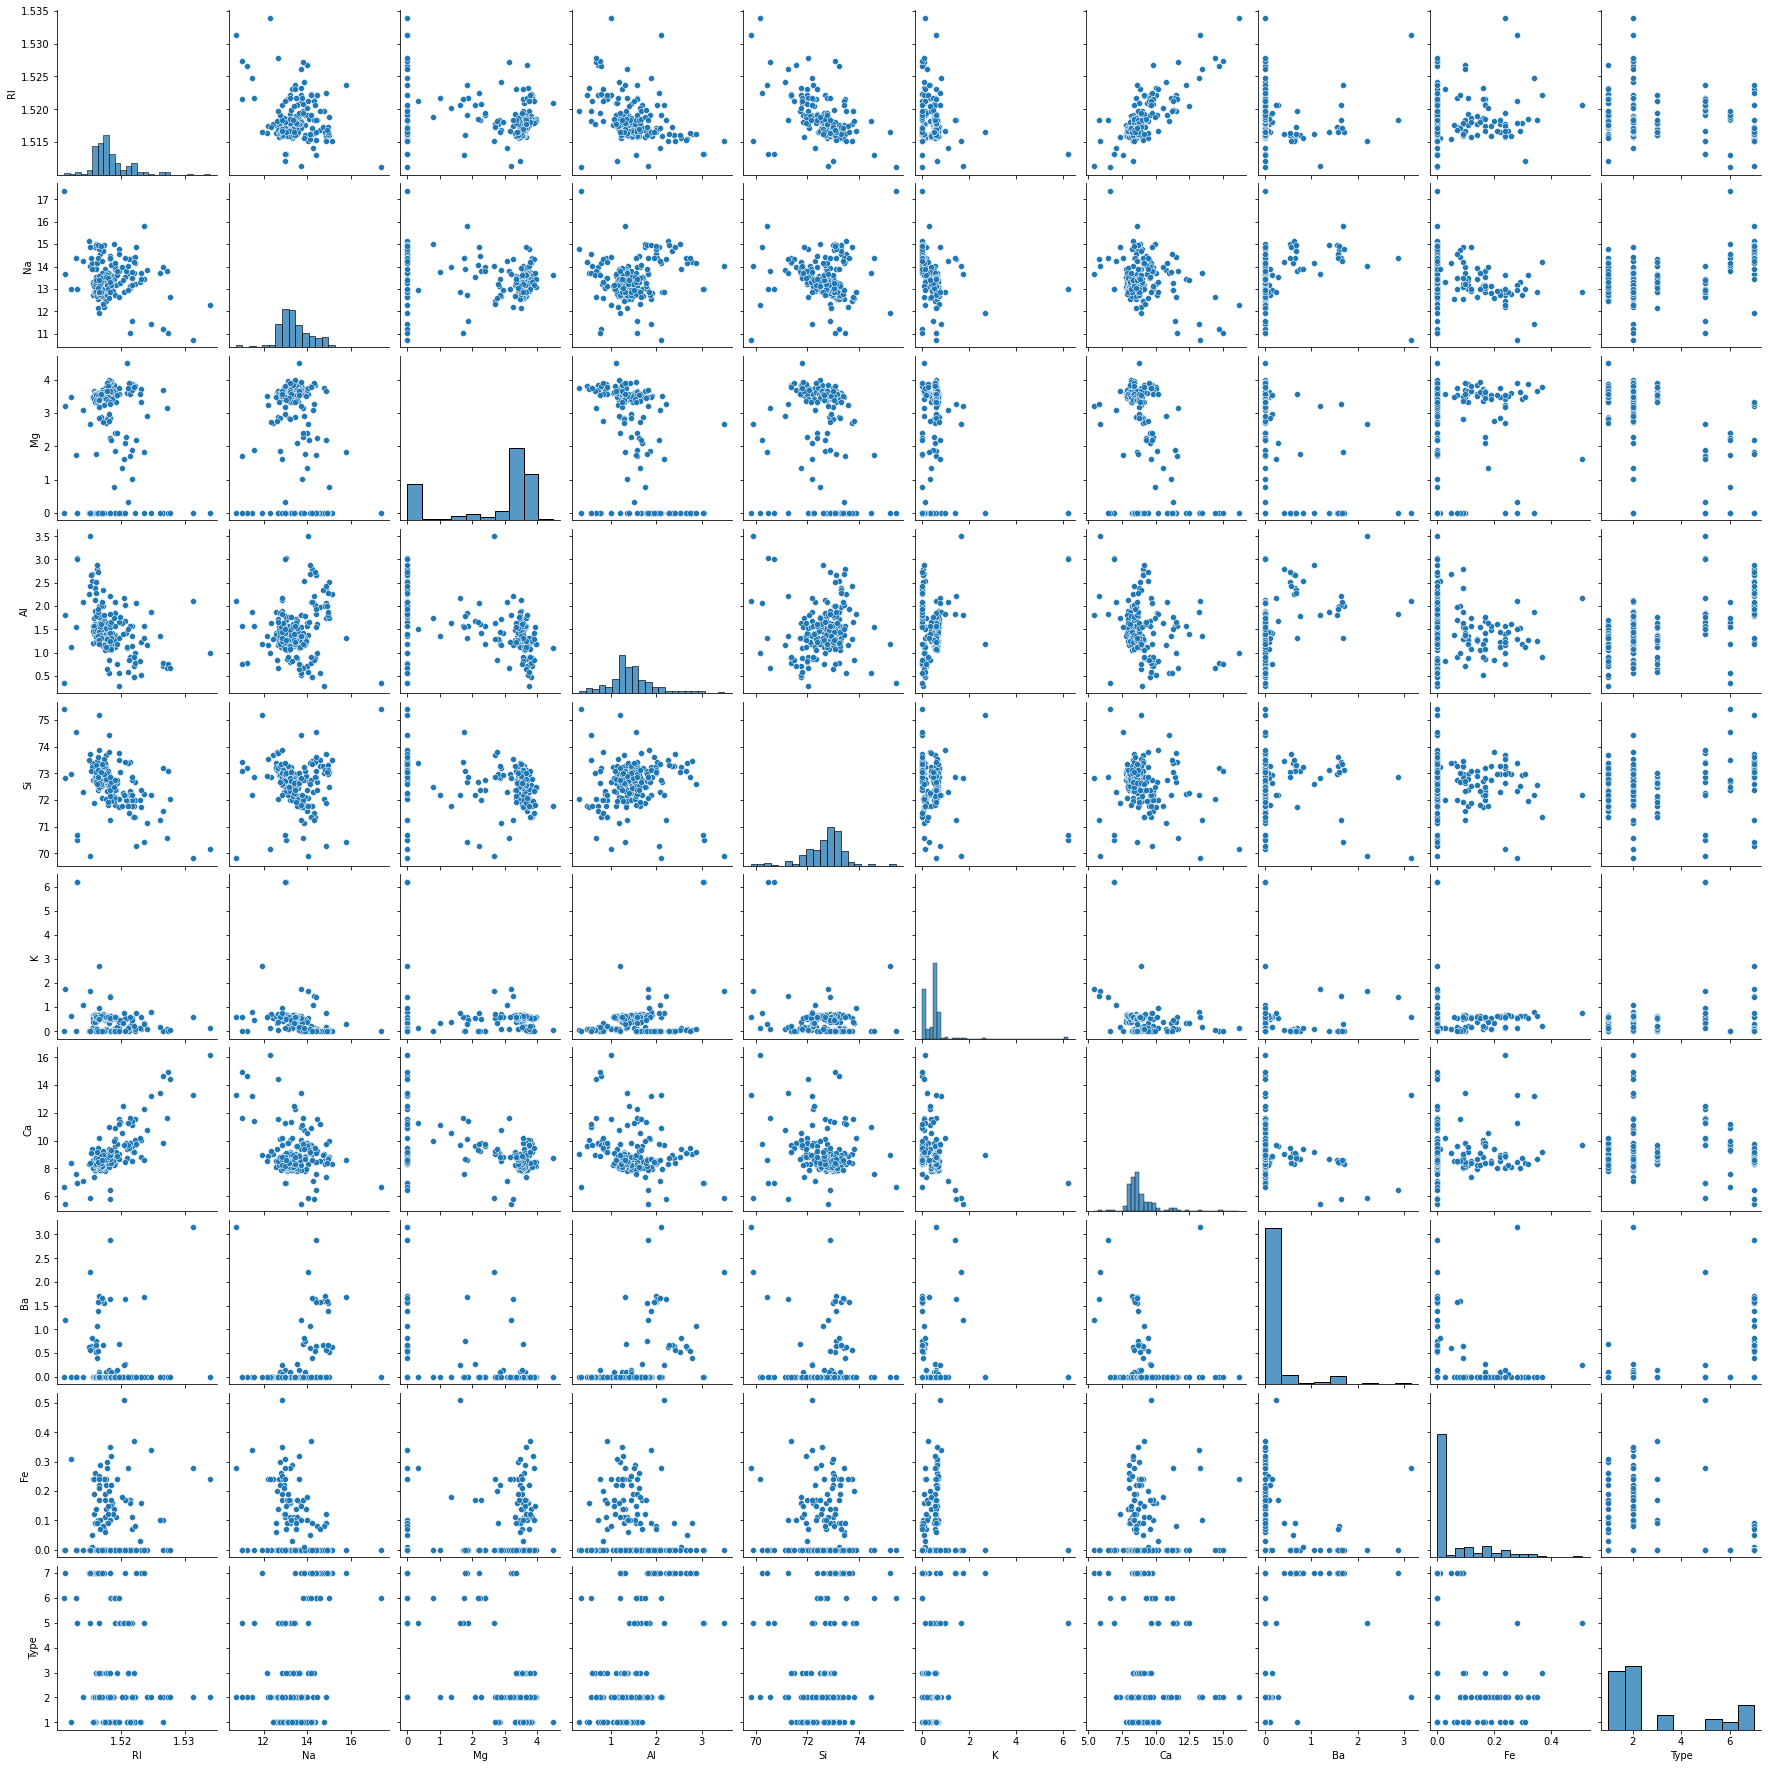

In [16]:
sns.pairplot(Glass)

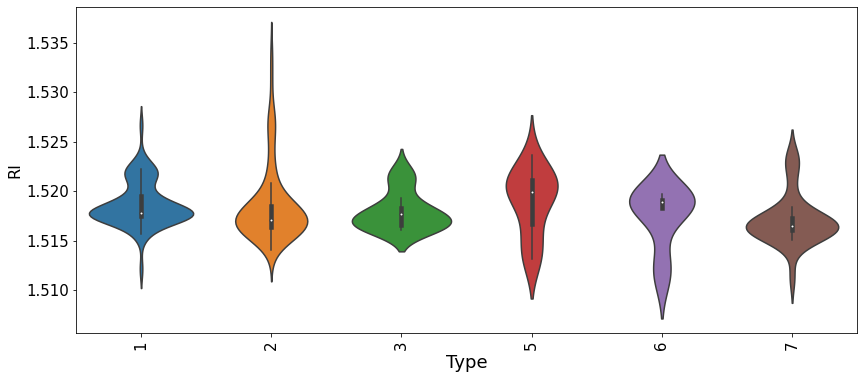

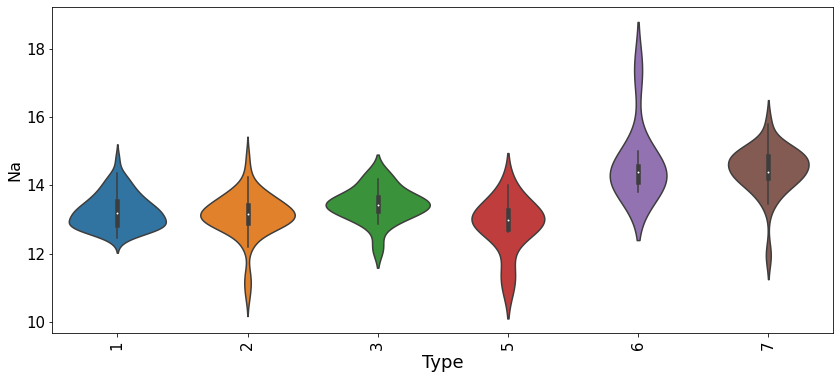

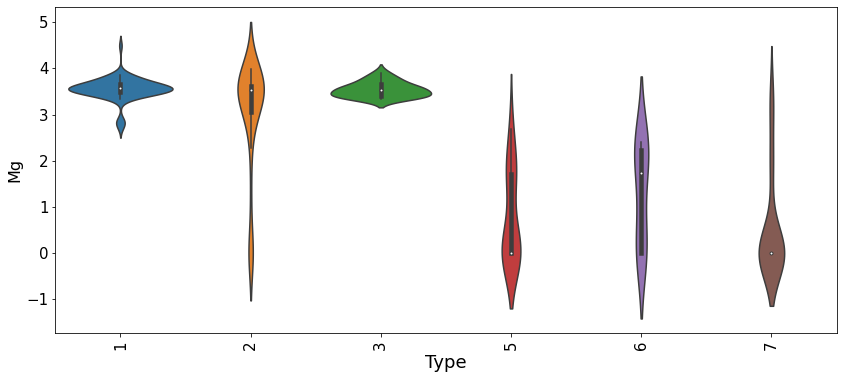

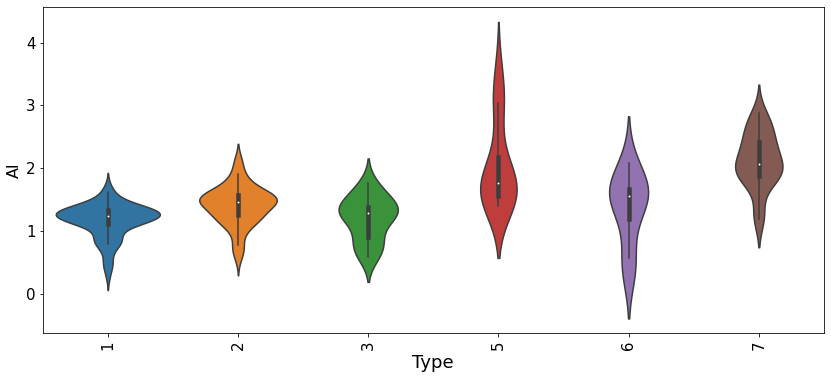

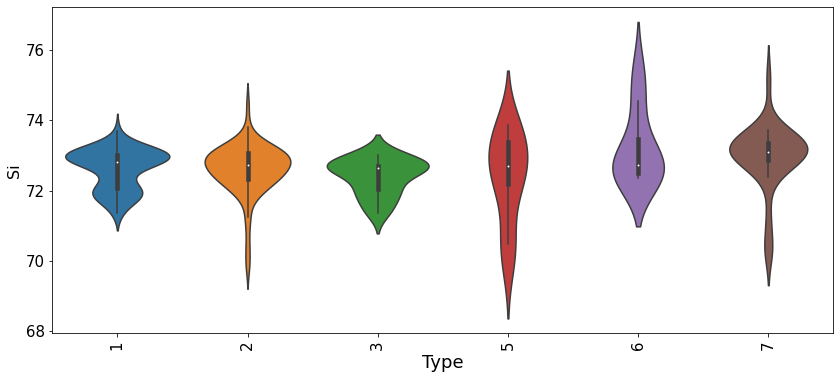

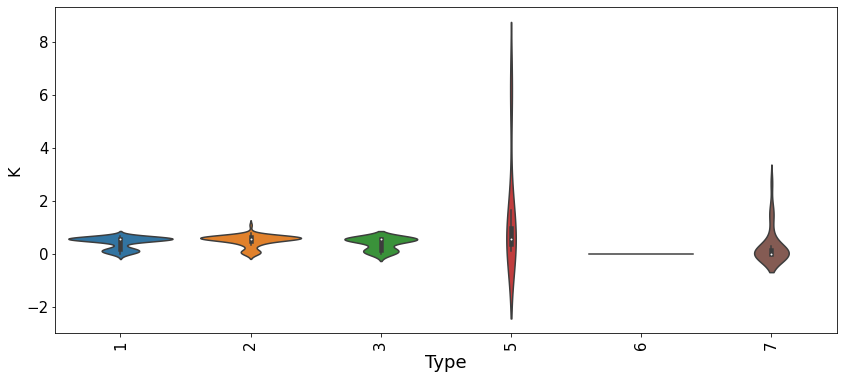

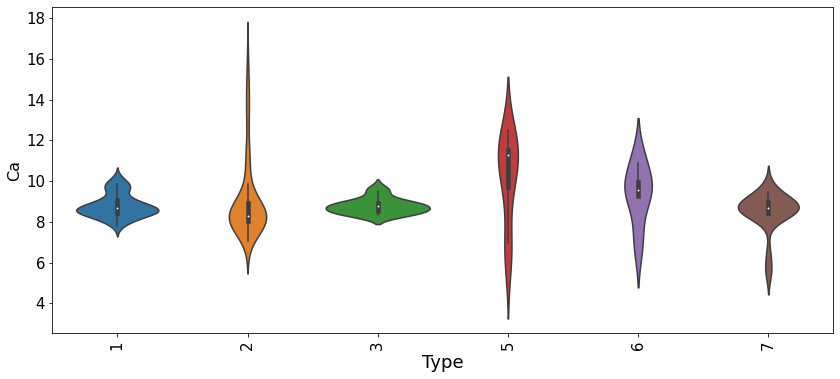

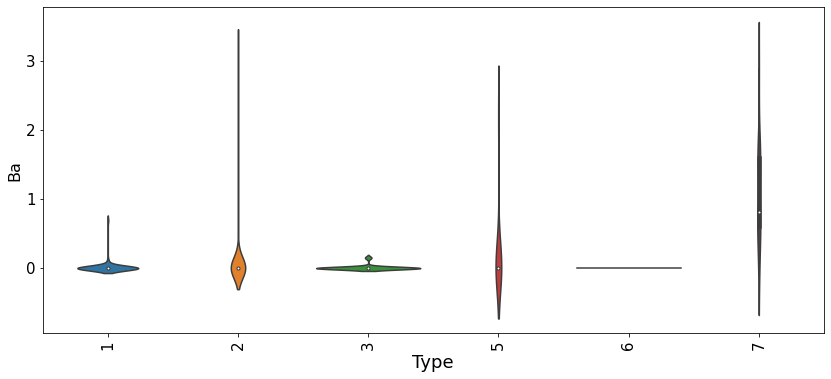

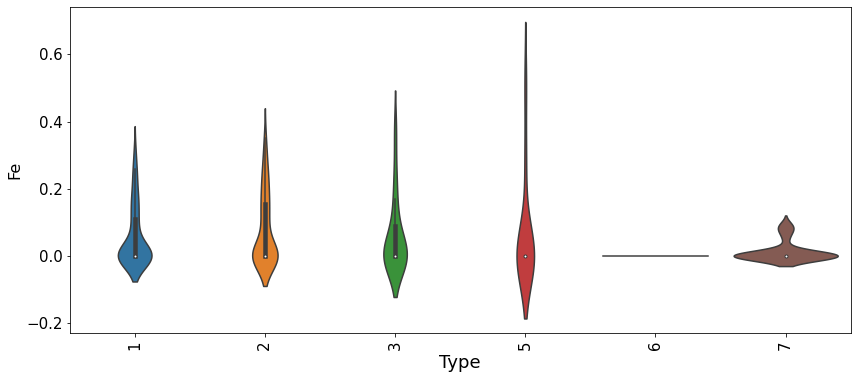

In [17]:
for i in Glass.columns[:-1]:
    plt.figure(figsize=(14,6))
    sns.violinplot(x = 'Type', y= i,data = Glass)
    plt.xticks(rotation = 90, size = 15)
    plt.yticks(size = 15)
    plt.xlabel('Type',fontsize=18)
    plt.ylabel(i, fontsize=16)

    plt.show()

Text(0.5, 1.0, 'Correlation with Glass type \n')

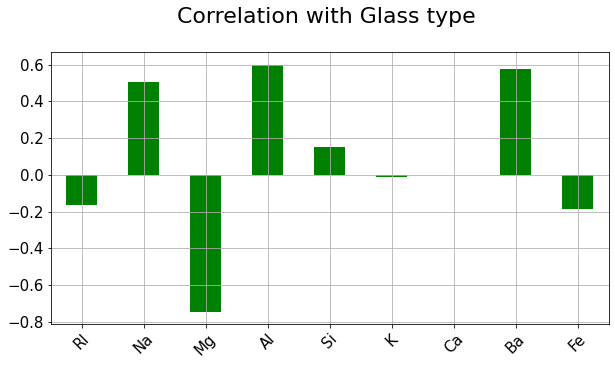

In [18]:
Data = Glass.iloc[:,:-1]

correlations = Data.corrwith(Glass.Type)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (10, 5), 
        fontsize = 15, 
        color = 'green',
        rot = 45, grid = True)
plt.title('Correlation with Glass type \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [20]:
scaled_features=scaler.fit_transform(Glass.drop('Type',axis=1))
data_head=pd.DataFrame(scaled_features,columns=Glass.columns[:-1])
data_head.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_head,Glass['Type'], test_size=0.3, random_state=42)

In [22]:
print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (149, 9)
Shape of X_test:  (65, 9)
Shape of y_train:  (149,)
Shape of y_test:  (65,)


# KNN Model

In [23]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
pred = model.predict(X_test)
acc= accuracy_score(y_test,pred)
print("The accuracy is  {}".format(acc))

The accuracy is  0.6461538461538462


In [25]:
kfold = KFold(n_splits=10)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.650952380952381


C:\Users\shrad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shrad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shrad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report                precision    recall  f1-score   support

           1       0.57      0.84      0.68        19
           2       0.59      0.57      0.58        23
           3       0.00      0.00      0.00         4
           5       0.67      0.33      0.44         6
           6       1.00      0.67      0.80         3
           7       0.90      0.90      0.90        10

    accuracy                           0.65        65
   macro avg       0.62      0.55      0.57        65
weighted avg       0.62      0.65      0.62        65



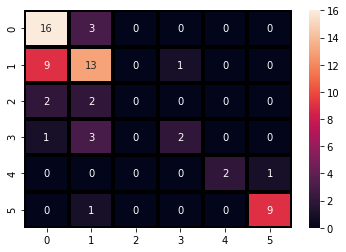

In [26]:
sns.heatmap(confusion_matrix(y_test, pred),annot=True,fmt = "d",linecolor="k",linewidths=3)
print('Classification Report ',classification_report(y_test,pred))

In [27]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predict=knn.predict(X_test)
    error_rate.append(np.mean(predict!=y_test))

Text(0, 0.5, 'Error Rate')

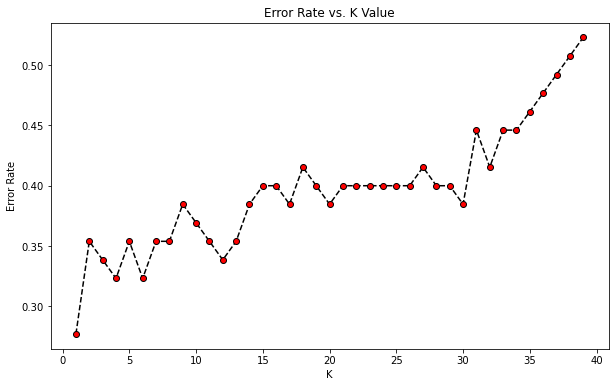

In [28]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='black', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=6)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

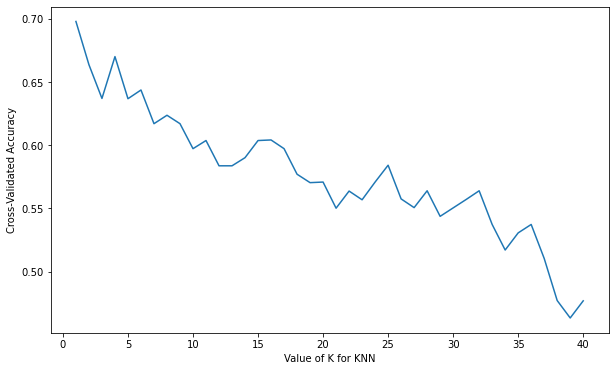

In [29]:
import matplotlib.pyplot as plt 
%matplotlib inline

# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.figure(figsize=(10,6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [30]:
knn_model=KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train,y_train)
pred_knn=knn_model.predict(X_test)

acc_knn= accuracy_score(y_test,pred_knn)
print("The accuracy is  {}".format(acc_knn))

The accuracy is  0.676923076923077


In [31]:
kfold_knn = KFold(n_splits=10)
results_knn = cross_val_score(knn_model, X_train, y_train, cv=kfold_knn)
print(results_knn.mean())

0.7042857142857143


C:\Users\shrad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shrad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shrad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report                precision    recall  f1-score   support

           1       0.59      0.89      0.71        19
           2       0.62      0.57      0.59        23
           3       0.00      0.00      0.00         4
           5       1.00      0.33      0.50         6
           6       0.75      1.00      0.86         3
           7       1.00      0.90      0.95        10

    accuracy                           0.68        65
   macro avg       0.66      0.62      0.60        65
weighted avg       0.67      0.68      0.65        65



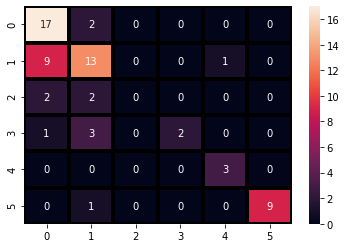

In [32]:
sns.heatmap(confusion_matrix(y_test, pred_knn),annot=True,fmt = "d",linecolor="k",linewidths=3)
print('Classification Report ',classification_report(y_test,pred_knn))

C:\Users\shrad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

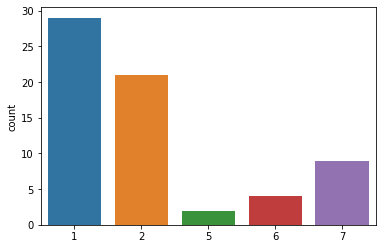

In [33]:
sns.countplot(pred_knn)


In [34]:
# parameters selection
kf = KFold(n_splits=15)
grid_params ={
    'n_neighbors':[1,2,3,4,5,6],
    'weights':['uniform','distance'],
    'metric' :['eclidean', 'manhattan']
}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose =10,cv=kf, n_jobs=-1)
gs_results = gs.fit(X_train, y_train)

Fitting 15 folds for each of 24 candidates, totalling 360 fits


C:\Users\shrad\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.71185185 0.71185185 0.68444444 0.71185185 0.67777778 0.68444444
 0.67777778 0.66444444 0.6637037  0.6837037  0.6637037  0.67703704]
  warnings.warn(


In [35]:
gs_results.best_score_

0.711851851851852

In [36]:
model_final = gs_results.best_estimator_
model_final

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [37]:
gs_results.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=KFold(n_splits=15, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['eclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']},
             verbose=10)>

In [38]:
pred_final = model_final.predict(X_test)
acc_final= accuracy_score(y_test,pred_final)
print("The accuracy is  {}".format(acc_final))

The accuracy is  0.7538461538461538


Classification Report                precision    recall  f1-score   support

           1       0.70      0.84      0.76        19
           2       0.75      0.65      0.70        23
           3       0.40      0.50      0.44         4
           5       1.00      0.50      0.67         6
           6       0.75      1.00      0.86         3
           7       1.00      1.00      1.00        10

    accuracy                           0.75        65
   macro avg       0.77      0.75      0.74        65
weighted avg       0.77      0.75      0.75        65



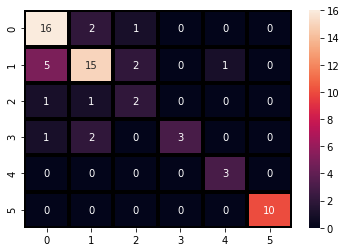

In [39]:
sns.heatmap(confusion_matrix(y_test, pred_final),annot=True,fmt = "d",linecolor="k",linewidths=3)
print('Classification Report ',classification_report(y_test,pred_final))

C:\Users\shrad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

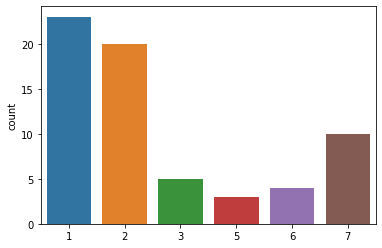

In [40]:
sns.countplot(pred_final)

In [41]:
X_train.iloc[:, 0]

137   -0.414363
65     0.866266
108    1.272239
181    0.169842
31    -0.295542
         ...   
106    4.252673
14    -0.242732
92    -0.820336
179    0.051020
102   -0.054599
Name: RI, Length: 149, dtype: float64